<a href="https://colab.research.google.com/github/Roozbeh96/Transformers-in-TBL-velocity-field-generation/blob/Master/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# **Downloading dataset from Data Reposiory for the University of Minnesota (DRUM)**
PIVMWT7: PIV(Meshed) wind tunnel dataset for 7[m/s]

PIVMWT10: PIV(Meshed) wind tunnel dataset for 10[m/s]

A,B: section A, and section B



In [2]:
# 7 [m/s]
!wget -O PIVMWT7A.mat "https://conservancy.umn.edu/bitstreams/3852c8e4-d726-4c2c-ba2a-f025052a34c3/download"
!wget -O PIVMWT7B.mat "https://conservancy.umn.edu/bitstreams/58eab2a0-5d8e-4e4e-ba2a-a47fb1c49a4e/download"
!wget -O scaling_paramPIVMWT7.mat "https://conservancy.umn.edu/bitstreams/2874cfc0-963e-4043-a12f-e35d7a7a10a2/download"

# 10 [m/s]
# !wget -O PIVMWT10A.mat "https://conservancy.umn.edu/bitstreams/e8effbf8-842c-4fa0-bf1f-3a03fc5064f0/download"
# !wget -O PIVMWT10B.mat "https://conservancy.umn.edu/bitstreams/eeab74b5-ee38-4e65-b153-e2c790c9b574/download"
# !wget -O scaling_paramPIVMWT10.mat "https://conservancy.umn.edu/bitstreams/26f4c028-4aa4-4b4d-bfd6-3d6cd40be4e0/download"


--2024-12-26 07:29:13--  https://conservancy.umn.edu/bitstreams/3852c8e4-d726-4c2c-ba2a-f025052a34c3/download
Resolving conservancy.umn.edu (conservancy.umn.edu)... 128.101.65.121
Connecting to conservancy.umn.edu (conservancy.umn.edu)|128.101.65.121|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://conservancy.umn.edu/server/api/core/bitstreams/3852c8e4-d726-4c2c-ba2a-f025052a34c3/content [following]
--2024-12-26 07:29:15--  https://conservancy.umn.edu/server/api/core/bitstreams/3852c8e4-d726-4c2c-ba2a-f025052a34c3/content
Reusing existing connection to conservancy.umn.edu:443.
HTTP request sent, awaiting response... 200 200
Length: 787570520 (751M) [application/matlab]
Saving to: ‘PIVMWT7A.mat’

PIVMWT7A.mat        100%[===================>] 751.08M  11.5MB/s    in 69s     

2024-12-26 07:30:24 (10.9 MB/s) - ‘PIVMWT7A.mat’ saved [787570520/787570520]

--2024-12-26 07:30:24--  https://conservancy.umn.edu/bitstreams/58eab2a0-5d8e-4e4e-ba2a-a47fb1c49

In [3]:
import scipy.io
import h5py

In [4]:
PIVMWT7A = h5py.File(r'/content/PIVMWT7A.mat')
PIVMWT7B = h5py.File(r'/content/PIVMWT7B.mat')
print(PIVMWT7A.keys())

# PIVMWT10A = h5py.File(r'/content/PIVMWT10A.mat')
# PIVMWT10B = h5py.File(r'/content/PIVMWT10B.mat')
# print(PIVMWT10A.keys())

<KeysViewHDF5 ['u', 'w', 'x', 'z']>


In [5]:
scaling_paramPIVMWT7 = scipy.io.loadmat('scaling_paramPIVMWT7.mat')
# scaling_paramPIVMWT10 = scipy.io.loadmat('scaling_paramPIVMWT10.mat')

print(scaling_paramPIVMWT7.keys())

dict_keys(['__header__', '__version__', '__globals__', 'Re_tau', 'U_inf', 'delta', 'k_s', 'nu', 'u_tau'])


In [6]:
u_tauPIVMWT7 = scaling_paramPIVMWT7['u_tau']
nuPIVMWT7 = scaling_paramPIVMWT7['nu']
ksPIVMWT7 = scaling_paramPIVMWT7['k_s']
deltaPIVMWT7 = scaling_paramPIVMWT7['delta']

# u_tauPIVMWT10 = scaling_paramPIVMWT10['u_tau']
# nuPIVMWT10 = scaling_paramPIVMWT10['nu']
# ksPIVMWT10 = scaling_paramPIVMWT10['k_s']
# deltaPIVMWT10 = scaling_paramPIVMWT10['delta']

In [7]:
uPIVMWT7A = PIVMWT7A['u'][:]
wPIVMWT7A = PIVMWT7A['w'][:]
xPIVMWT7A = PIVMWT7A['x'][:]
zPIVMWT7A = PIVMWT7A['z'][:]

uPIVMWT7B = PIVMWT7B['u'][:]
wPIVMWT7B = PIVMWT7B['w'][:]
xPIVMWT7B = PIVMWT7B['x'][:]
zPIVMWT7B = PIVMWT7B['z'][:]

In [ ]:
# uPIVMWT10A = PIVMWT10A['u'][:]
# wPIVMWT10A = PIVMWT10A['w'][:]
# xPIVMWT10A = PIVMWT10A['x'][:]
# zPIVMWT10A = PIVMWT10A['z'][:]

# uPIVMWT10B = PIVMWT10B['u'][:]
# wPIVMWT10B = PIVMWT10B['w'][:]
# xPIVMWT10B = PIVMWT10B['x'][:]
# zPIVMWT10B = PIVMWT10B['z'][:]

# The Exploratory data analysis (EDA) extensivly done in the following paper:
https://www.cambridge.org/core/journals/journal-of-fluid-mechanics/article/stochastic-modelling-of-the-instantaneous-velocity-profile-in-roughwall-turbulent-boundary-layers/492F3CD03C8C3E7ED306E9117B848B5E

(142, 155)
142


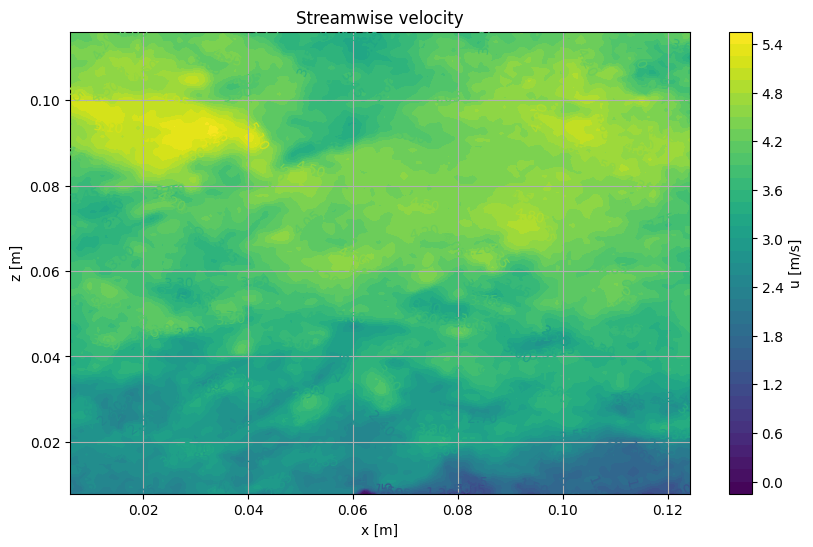

In [20]:
X, Z = np.meshgrid(xPIVMWT7A, zPIVMWT7A)
print(uPIVMWT7A[10,:,:].T.shape)
print(zPIVMWT7A.shape[1])

plt.figure(figsize=(10,6))
contour = plt.contourf(X, Z, uPIVMWT7A[12,:,:].T, levels=50, cmap='viridis')
plt.clabel(contour, inline=False, fontsize=10)
plt.colorbar(contour, label="u [m/s]")
plt.title("Streamwise velocity")
plt.xlabel("x [m]")
plt.ylabel("z [m]")
plt.grid(True)
plt.show()